# Dynamic Linear Models

## Imports

In [12]:
import numpy as np
import pandas as pd
import pydlm
import matplotlib.pyplot as plt

## Simple example
(random walk)

In [3]:
n = 100
a = 1.0 + np.random.normal(0, 5, n) # the intercept
x = np.random.normal(0, 2, n) # the control variable
b = 3.0 # the coefficient
y = a + b * x

In [5]:
dlm = pydlm.dlm(y)
dlm = dlm + pydlm.trend(degree=0, discount=0.98, name='a', w=10.0)
dlm = dlm + pydlm.dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)
dlm

## Fit model Level-trend

#### Randomly generate data

In [8]:
data = [0] * 100 + [3] * 100

#### Build model

In [9]:
# creadte model
dlm = pydlm.dlm(data)

# add components
dlm = dlm + pydlm.trend(1, name='lineTrend', w=1.0) # covariance=1
dlm = dlm + pydlm.seasonality(7, name='7day', w=1.0)
dlm = dlm + pydlm.autoReg(degree=3, data=data, name='ar3', w=1.0)
dlm.ls()

# delete unwanted component
dlm.delete('7day')
dlm.ls()

# Analize results
dlm.fitForwardFilter()
dlm.fitBackwardSmoother()

The static components are
lineTrend (degree = 2)
7day (degree = 7)
 
There is no dynamic component.
 
The automatic components are
ar3 (dimension = 3)
The static components are
lineTrend (degree = 2)
 
There is no dynamic component.
 
The automatic components are
ar3 (dimension = 3)
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


c:\program files\python38\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


#### Plot

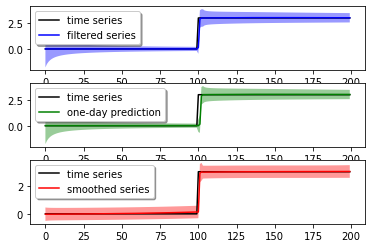

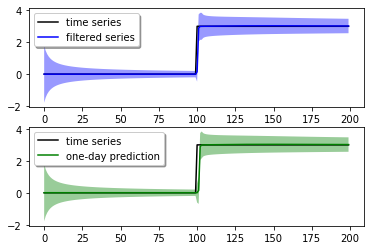

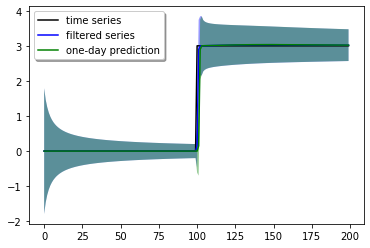

In [10]:
dlm.plot()
dlm.turnOff('smoothed plot')
dlm.plot()
dlm.turnOff('multiple plots')
dlm.plot()

## With seasonality

The static components are
trend (degree = 2)
seasonality (degree = 4)
 
There is no dynamic component.
 
There is no automatic component.
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.
MSE 1 :  0.3759422890610195
MSE 2 :  0.37301856100886865


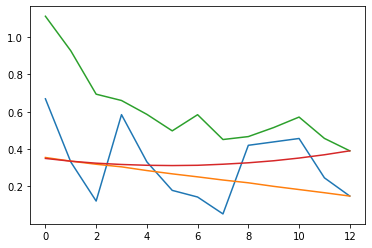

In [13]:
# Re-fit
dlm = dlm + pydlm.seasonality(4)
dlm.ls()
dlm.fit()

# Missing observations
data = [1, 0, 0, 1, 0, 0, None, 0, 1, None, None, 0, 0]
dlm = pydlm.dlm(data) + pydlm.trend(1, w=1.0)
dlm.fit()  # fit() will fit both forward filter and backward smoother

# Tunning
tuner = pydlm.modelTuner(method='gradient_descent', loss='mse')
dlm2 = tuner.tune(dlm, maxit=100)
dlm2.fit()

print("MSE 1 : ", dlm.getMSE())
print("MSE 2 : ", dlm2.getMSE())

# Filtered results
filtMean = dlm.getMean(filterType='forwardFilter')
smoothMean = dlm.getMean(filterType='backwardSmoother')
filtVar = dlm.getVar(filterType='forwardFilter')
smoothVar = dlm.getVar(filterType='backwardSmoother')

plt.plot(filtMean)
plt.plot(smoothMean)
plt.plot(filtVar)
plt.plot(smoothVar)
plt.show()

## Post-Analysis

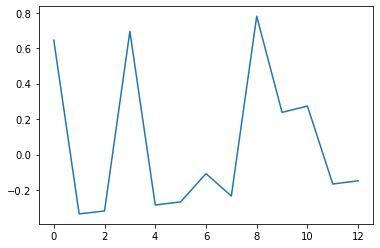

In [18]:
filtCI = dlm.getInterval(filterType='forwardFilter')
smoothCI = dlm.getInterval(filterType='backwardSmoother')

# get the residual time series
res = dlm.getResidual(filterType='backwardSmoother')

plt.plot(res);

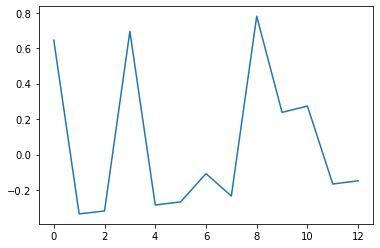

In [16]:
# get the filtered and smoothed mean for a given component
#filtTrend = dlm.getMean(filterType='forwardFilter', name='lineTrend')
#smoothTrend = dlm.getMean(filterType='backwardSmoother', name='lineTrend')

# get the latent states
#allStates = dlm.getLatentState(filterType='forwardFilter')
#trendStates = dlm.getLatentState(filterType='forwardFilter', name='lineTrend')

# Update
#dlm = dlm([]) + pydlm.trend(1) + pydlm.seasonality(7)
#for t in range(0, len(data)):
    #dlm.append([data[t]])
    #dlm.fitForwardFilter()
#filteredObs = dlm.getFilteredObs()

## Credits & Links